In [1]:
%load_ext autoreload
%autoreload 2

from matplotlib import pyplot as plt

from data_loading import load_annotated_6k_collection

In [2]:
tfs = load_annotated_6k_collection()

In [4]:
import seaborn as sns
sns.cubehelix_palette(8)

[[0.9312692223325372, 0.8201921796082118, 0.7971480974663592],
 [0.8822898168737189, 0.695820866705742, 0.7065457119485431],
 [0.8135380254700676, 0.5705055182357822, 0.639280859468155],
 [0.7195800708349119, 0.45537982893127477, 0.5861062995810926],
 [0.6046906802634469, 0.35739308184976665, 0.5337407853692406],
 [0.46496993672552045, 0.26868986121314253, 0.4636527763640647],
 [0.3210194743259347, 0.19303051265196464, 0.3707881677724792],
 [0.1750865648952205, 0.11840023306916837, 0.24215989137836502]]

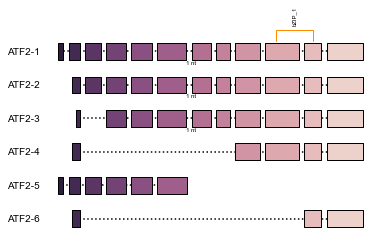

In [7]:
tfs['ATF2'].exon_diagram()

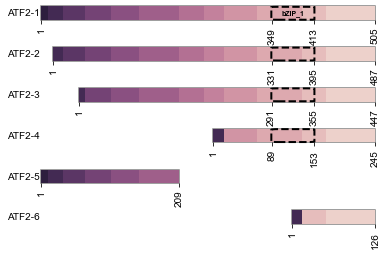

In [10]:
tfs['ATF2'].protein_diagram()

In [108]:
for tf in tfs.values():
    fig, ax = plt.subplots()
    tf.protein_diagram()
    plt.savefig('../../figures/per_gene/protein_diagram/{}.pdf'.format(tf.name),
                bbox_inches='tight')
    plt.close(fig)

In [92]:
tfs['ZNF473'].orfs[0].aa_seq_features

[Pfam_domain: PF09723 Zn-ribbon_8 208-249,
 Pfam_domain: PF09723 Zn-ribbon_8 265-294,
 Pfam_domain: PF09723 Zn-ribbon_8 319-345,
 Pfam_domain: PF09723 Zn-ribbon_8 402-444,
 Pfam_domain: PF09723 Zn-ribbon_8 455-499,
 Pfam_domain: PF09723 Zn-ribbon_8 514-525,
 Pfam_domain: PF09723 Zn-ribbon_8 561-607,
 Pfam_domain: PF09723 Zn-ribbon_8 644-672,
 Pfam_domain: PF09723 Zn-ribbon_8 673-715,
 Pfam_domain: PF09723 Zn-ribbon_8 729-771,
 Pfam_domain: PF09723 Zn-ribbon_8 785-824,
 Pfam_domain: PF09723 Zn-ribbon_8 841-870,
 Pfam_domain: PF01286 XPA_N 208-227,
 Pfam_domain: PF01286 XPA_N 320-336,
 Pfam_domain: PF01286 XPA_N 346-358,
 Pfam_domain: PF01286 XPA_N 374-393,
 Pfam_domain: PF01286 XPA_N 430-443,
 Pfam_domain: PF01286 XPA_N 458-477,
 Pfam_domain: PF01286 XPA_N 486-499,
 Pfam_domain: PF01286 XPA_N 514-527,
 Pfam_domain: PF01286 XPA_N 561-581,
 Pfam_domain: PF01286 XPA_N 590-605,
 Pfam_domain: PF01286 XPA_N 645-664,
 Pfam_domain: PF01286 XPA_N 673-690,
 Pfam_domain: PF01286 XPA_N 701-720,
 Pf

In [88]:
max(tfs.values(), key=lambda x: len(x.orfs[0].aa_seq_features))

Gene: ZNF473
Isoforms: ['ZNF473-1', 'ZNF473-2']

In [38]:
from Bio.Align.Applications import MuscleCommandline
#[iso.aa_seq for iso in tfs['ATF2'].orfs]
help(Bio.Align)

  sort(self, key=None, reverse=False)
     |      Sort the rows (SeqRecord objects) of the alignment in place.
     |      
     |      This sorts the rows alphabetically using the SeqRecord object id by
     |      default. The sorting can be controlled by supplying a key function
     |      which must map each SeqRecord to a sort value.
     |      
     |      This is useful if you want to add two alignments which use the same
     |      record identifiers, but in a different order. For example,
     |      
     |      >>> from Bio.Alphabet import generic_dna
     |      >>> from Bio.Seq import Seq
     |      >>> from Bio.SeqRecord import SeqRecord
     |      >>> from Bio.Align import MultipleSeqAlignment
     |      >>> align1 = MultipleSeqAlignment([
     |      ...              SeqRecord(Seq("ACGT", generic_dna), id="Human"),
     |      ...              SeqRecord(Seq("ACGG", generic_dna), id="Mouse"),
     |      ...              SeqRecord(Seq("ACGC", generic_dna), id="Chic

In [14]:
tfs['ATF2'].orfs[0].aa_seq_features

[Pfam_domain: PF00170 bZIP_1 350-413,
 DBD_flank: PF00170_flank_N N_DBD_flank 335-349,
 DBD_flank: PF00170_flank_C C_DBD_flank 414-428]